<a href="https://colab.research.google.com/github/jimmylihui/project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to build models using ANN and SVM to discover the members in globular cluster M56 

Firstly, The data is read from Rishel et al

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
from sklearn.decomposition import PCA

my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'project.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)#reading the data
df = df.iloc[: , :]#reading the data
x=df.values#reading the value:X,Y,MUX,MUY
print(x)
x = StandardScaler().fit_transform(x)#applying standard scalar to the data

a=x[0:20]

pca = PCA(n_components=2)#using PCA with component of 2
principalComponents = pca.fit_transform(a)#fit and transform the data with PCA
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])#transform the array into datafram
print(principalDf)
print(pca.transform(a))
print(pca.transform(a[0:10]))
#transform keep the model

[[ 1.00000e+00  1.02240e+00  8.71500e-01  3.00000e-02  1.00000e-02
   0.00000e+00]
 [ 2.00000e+00  2.37590e+00  1.32750e+00 -1.40000e-01  2.60000e-01
   0.00000e+00]
 [ 4.00000e+00  5.04090e+00  1.76420e+00 -3.10000e-01 -1.20000e-01
   0.00000e+00]
 ...
 [ 5.85000e+02  3.92769e+01  4.29090e+00  3.10000e-01  2.60000e-01
   0.00000e+00]
 [ 5.86000e+02  3.94800e+01  3.84000e+00 -4.60000e-01 -4.40000e-01
   0.00000e+00]
 [ 5.87000e+02  3.83421e+01  3.26890e+00  4.00000e-02  1.00000e-02
   0.00000e+00]]
    principal component 1  principal component 2
0               -0.303041               0.019765
1               -0.398697               0.412598
2               -0.884219               0.251138
3                0.920416              -0.863358
4                0.517780              -0.472070
5               -1.217026               1.246021
6                1.279902               0.272636
7                4.581101               0.231053
8               -0.121516              -0.525948
9     

Plot data without membership label

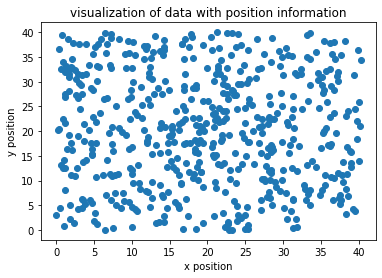

In [ ]:

def scatter_plot(plt, x_data, y_data, x_label,y_label,title0):
  """
    scatter_plot draw a 2-dimensional scatter plot.

    :param plt: describe plot function
    :param x_data: describe data of x 
    :param y_data: describe data of y 
    :param x_label: describe label of x 
    :param y_label: describe label of y 
    :param title0: describe title of plot 
    :return: none
  """ 
  plt.scatter(x_data,y_data)#plot the data with X and Y
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title0)

def scatter_plot_c(plt,x_data,y_data,x_label,y_label,title0,c0,cmap0,classes):
  """
    scatter_plot draw a 2-dimensional scatter plot.

    :param plt: describe plot function
    :param x_data: describe data of x 
    :param y_data: describe data of y 
    :param x_label: describe label of x 
    :param y_label: describe label of y 
    :param title0: describe title of plot 
    :param c0: describe classification
    :param cmap0: describe color of classification
    :param classes: describe label of classification
    :return: none
  """ 
  scatter=plt.scatter(x_data,y_data,c=c0,cmap=cmap0)#plot the data with X and Y
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title0)
  plt.legend(handles=scatter.legend_elements()[0],labels=classes)

scatter_plot(plt,df.X,df.Y,"x position","y position","visualization of data with position information")

Plot data with members

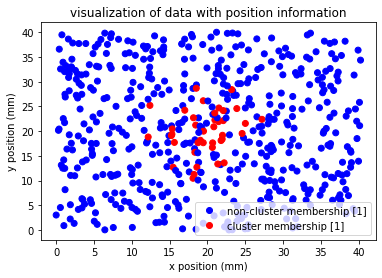

In [ ]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['b','r'])

classes = ['non-cluster membership [1]', 'cluster membership [1]']#red data means cluster member while blue data means non-cluster member

scatter_plot_c(plt, df.X, df.Y, "x position (mm)","y position (mm)","visualization of data with position information",df.membership,colors,classes)

Finding the center of star

In [ ]:

def find_centroid(x_data,y_data):
  """
    find_centroid find the center of the 2-dimensional data.

    :param x_data: describe data of x 
    :param y_data: describe data of y 
    :return: minimum_distance: describe the total distance from centre to other point
    :return: minimum_number:discribe the number of centre
    :return: position:discribe the position of centre
  """ 
  center_point_number=1
  minimum_distance=0
  minimum_number=1
  for n in range(0, len(x_data)):#this loop is to find the point who has the smallest total distance to all other point
    first_point_x=x_data[n]
    first_point_y=y_data[n]
    total_distance=0
    for m in range(0, len(x_data)):
      second_point_x=x_data[m]
      second_point_y=y_data[m]
      total_distance=total_distance+(first_point_x-second_point_x)**2+(first_point_y-second_point_y)**2
    if n==1:
      minimum_distance=total_distance
    elif total_distance<minimum_distance:
      minimum_distance=total_distance 
      minimum_number=n
  position=(x_data[minimum_number],y_data[minimum_number])
  return minimum_number,minimum_distance,position

minimum_number,minimum_distance,centroid=find_centroid(df.X,df.Y)
print(minimum_distance)


print(df.NR[minimum_number])#the point of having smallest total distance is the center point


print(centroid)

136492.7616898928
263
(19.4866, 19.9863)


Splite data into 4 zones

In [ ]:
#draw zone 1 to zone 4
zone1=[];
zone1_number=[];
zone2=[];
zone3=[];
zone4=[];
zone2_number=[];
zone3_number=[];
zone4_number=[];

for n in range(0, len(df.X)):#this loop is to find the No of star in each zoo according to their distance to the centeroid
  distance=(df.X[n]-centroid[0])**2+(df.Y[n]-centroid[1])**2
  
  if (distance<25):
    zone1.append(df.NR[n])
    zone1_number.append(n);
  elif(distance<49.9849):
    zone2.append(df.NR[n])
    zone2_number.append(n);
  elif(distance<74.9956):
    zone3.append(df.NR[n])
    zone3_number.append(n);
  elif(distance<100):
    zone4.append(df.NR[n])
    zone4_number.append(n);
print(zone1)
print(zone2)
print(zone3)
print(zone4)

Plot zone 1 with positions and members

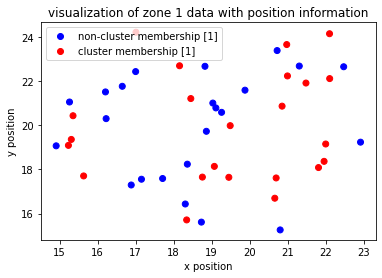

In [ ]:
#plot zone 1 based on position
def member_selection(member_id):
  """
    member_selection find the member of the 2-dimensional data with their id.

    :param member_id: describe id of data 
    :return: zone1_x_axis: describe the x axis of data
    :return: zone1_y_axis:discribe the y axis of data
    :return: zone1_label:discribe the label of data
  """ 
  x_axis=[];
  y_axis=[];
  label=[];
  for n in member_id:#this loop finding the X, Y and members of stars in Zone 1
    x_axis.append(df.X[n])
    y_axis.append(df.Y[n])
    label.append(df.membership[n])
  return x_axis,y_axis,label


zone1_x_axis,zone1_y_axis,zone1_label=member_selection(zone1_number)
scatter_plot_c(plt,zone1_x_axis,zone1_y_axis,"x position","y position","visualization of zone 1 data with position information",zone1_label,colors,classes)

calculating the principal component of zone 1 data

In [ ]:
#applying pca to zone 1
zone1_values=[]
zone1_tag=[]

for n in zone1_number:#this loop save the values:X Y MUX MUY of starts in Zone1 to zone1.values, and membership of that to zone1.tag
  zone1_values.append([df.X[n],df.Y[n],df.MUX[n],df.MUY[n]])
  zone1_tag.append(df.membership[n])
print(zone1_values)

scaler = StandardScaler()#setting up standard scalar, standard scaler standardize features by removing the mean and scaling to unit variance.
scaler.fit(zone1_values)#fit the standard scalar with values in Zone1

zone1_values=scaler.transform(zone1_values)#applying standard scalar to values in Zone1


print(zone1_tag)



pca=PCA(n_components=2)#initializing the PCA
pca.fit_transform(zone1_values)#applying the PCA to the values of zone 1 
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)#seting up kernel PCA with linear Kernel
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04, fit_inverse_transform=True)#seting up kernel PCA with rbf Kernel
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)#seting up kernel PCA with sigmoid Kernel


[[14.9124, 19.0715, 0.35, -2.64], [15.2344, 19.0916, -0.13, 0.23], [15.2632, 21.058, 0.04, -0.28], [17.01, 24.22, 0.06, 0.5], [17.00133, 22.437, -0.03, -0.05], [18.8235, 22.6762, 0.81, -0.57], [18.1554, 22.7008, 0.06, 0.67], [19.8753, 21.5942, -0.42, 0.71], [16.65, 21.77, -0.25, -0.23], [16.2084, 21.5147, -0.11, 1.21], [18.4513, 21.2142, -0.09, 0.36], [19.03, 21.01, 0.07, 1.45], [19.11, 20.79, -0.31, 0.85], [19.26, 20.59, 0.06, 0.14], [15.3555, 20.436, -0.2, 0.55], [16.2255, 20.3041, -0.08, 0.11], [19.4866, 19.9863, -0.17, 0.51], [18.86, 19.73, -0.63, -0.45], [15.3101, 19.3612, 0.13, 0.62], [18.36, 18.24, 0.51, 1.1], [19.07, 18.14, 0.09, 0.76], [19.4507, 17.6444, -0.23, 0.31], [18.7556, 17.6542, -0.31, 0.54], [17.71, 17.59, -0.53, 0.51], [17.1543, 17.5577, 0.38, 1.33], [15.6342, 17.7066, -0.06, 0.35], [16.8853, 17.2962, 0.21, -0.16], [18.306, 16.435, 0.18, 0.15], [18.342, 15.7131, -0.07, 0.61], [18.7292, 15.6137, 0.37, -0.09], [20.8, 15.26, 0.01, -0.18], [20.6586, 16.6969, 0.0, 0.54], 

Plot the principal component of data in Zone 1

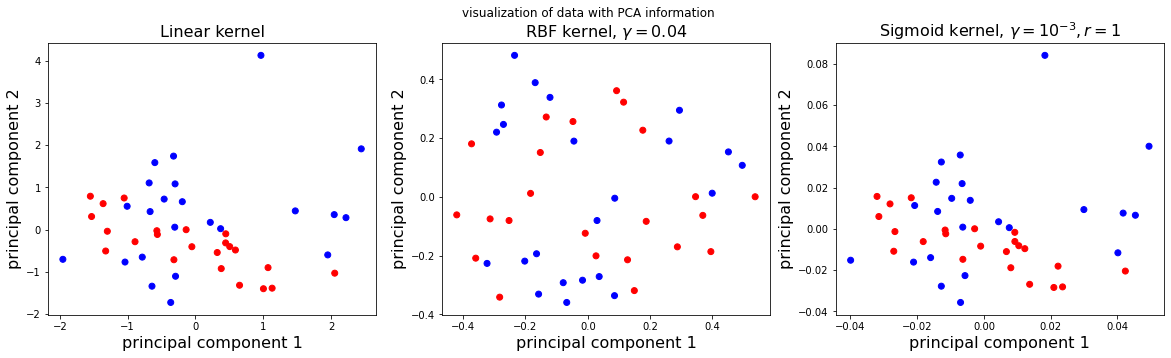

In [ ]:



 
#loop over methods and plot the projection of the Swiss roll
plt.figure(figsize=(20, 5))
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.suptitle("visualization of data with PCA information")
colormap = np.array(['b', 'r'])
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), #plot datas after applying linear kernel, RBF kernel and sigmoid kernel
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), 
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(zone1_values)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot), plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colormap[zone1_tag])
    plt.xlabel("principal component 1",fontsize=16)
    plt.ylabel("principal component 2",fontsize=16)
    plt.title(format(title), fontsize=16)


finding the hyperparameter to use

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


clf = Pipeline([#setting up the basic parameter of PCA
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{#setting up the different options of kernel and gamma of PCA
        "kpca__gamma": np.linspace(0.0001, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid","linear"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)#finding the best parameter for gamma and PCA
grid_search.fit(zone1_values, zone1_tag)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'kpca__gamma': 0.0001, 'kpca__kernel': 'linear'}
0.6124999999999999


test SVM with different parameters 

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 10 # giving 2 options of gamma, 0.1,10
C1, C2 = 0.001, 1000 #giving 2 otions of C 0.001 and 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2) #setting up 4 combinations of gamma and C

svm_clfs = []
for gamma, C in hyperparams:  #for each pair of gamma and C, applying them to rbf kernel and then applying kernal to PCA
    rbf_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ))
    rbf_kernel_svm_clf.fit(X_reduced, zone1_tag)
    svm_clfs.append(rbf_kernel_svm_clf)



Text(0.5, 0.98, 'visualization of boundary in zone 1 with different pair of gamma and C')

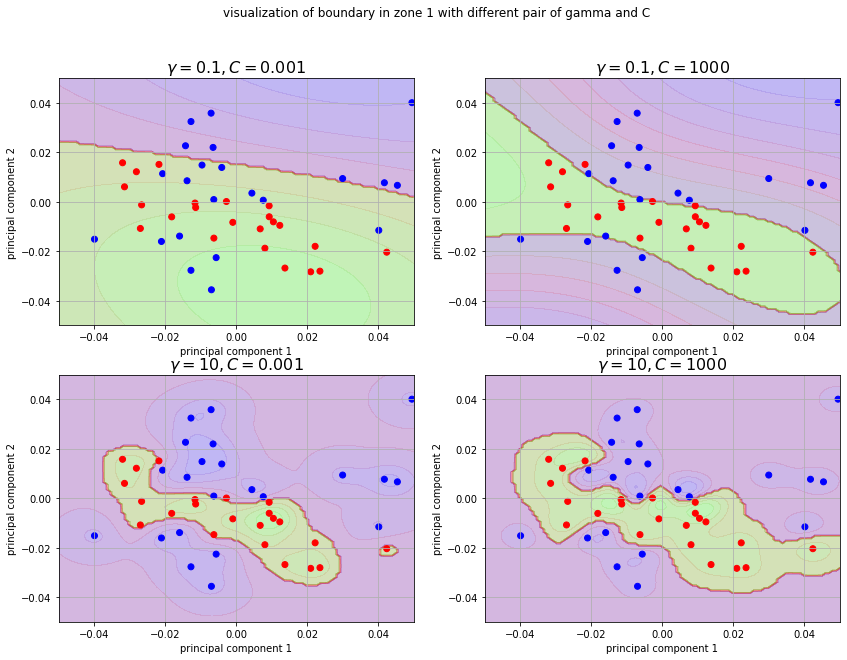

In [ ]:

# this function predict the contour with different pair of gamma and C
# parameter {clf} array including pipline Pipeline((
#            ("scaler", StandardScaler()),
#            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
#        ))
# parameter {axes} array setting up the range to predict
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
# this function plot contour
# parameter X array the values of star
# parameter y array the label of star
# parameter axes array the range of plot
def plot_dataset(X, y, axes):
    plt.scatter(X[:, 0], X[:, 1], c=colormap[y])
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel("principal component 1", fontsize=10)
    plt.ylabel("principal component 2", fontsize=10 )
    
plt.figure(figsize=(14, 10))

for i, svm_clf in enumerate(svm_clfs):#plot result with each pair of gamma and C
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-0.05, 0.05, -0.05, 0.05])
    plot_dataset(X_reduced, zone1_tag, [-0.05, 0.05, -0.05, 0.05])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.suptitle('visualization of boundary in zone 1 with different pair of gamma and C')



Apply SVM to principal component in zone 1 and plot the result

f1 score of zone 1 is 0.6536796536796536
precision score of zone 1 is 0.8076923076923077
recall score of zone 1 is 0.6875
conf_matrix of zone 1 is [[3 5]
 [0 8]]
the score of (0.1, 0.001) is
f1: 0.3333333333333333
precision: 0.25
recall: 0.5
the score of (0.1, 1000) is
f1: 0.6536796536796536
precision: 0.8076923076923077
recall: 0.6875
the score of (10, 0.001) is
f1: 0.6190476190476191
precision: 0.6333333333333333
recall: 0.625
the score of (10, 1000) is
f1: 0.7333333333333334
precision: 0.8333333333333333
recall: 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


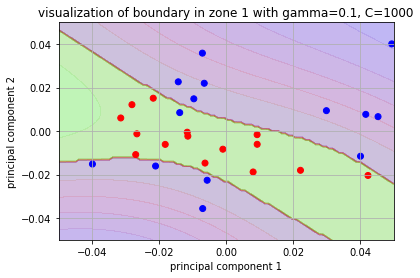

In [ ]:
#using half data as training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
    X_reduced, zone1_tag, test_size=0.33, random_state=42)#splite the processed data in zone1 into 67% training data, 33% of testing data

rbf_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))#setting up gamma=0.1, C=100
        ))
rbf_kernel_svm_clf.fit(X_train, y_train) #fit the boundary
plot_predictions(rbf_kernel_svm_clf, [-0.05, 0.05, -0.05, 0.05]) #plot boundary
plot_dataset(X_train, y_train, [-0.05, 0.05, -0.05, 0.05]) # plot datapoint
plt.title("visualization of boundary in zone 1 with gamma=0.1, C=1000")
y_test_pred = rbf_kernel_svm_clf.predict(X_test)


y_test_pred
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


#score for svm with (0.1,0.001)
def calculate_score_zone(tag,predict,zone):
  """
    calculate_score_zone find the f1 score, precision score and recall score of actual label and predict label in each zone.

    :param tag: describe actual label 
    :param predict: describe predicted label
    
  """ 
  print("f1 score of zone", zone ,"is",f1_score(tag, predict, average="macro")) #compute the f1 score of test data
  print("precision score of zone", zone ,"is",precision_score(tag, predict, average="macro"))#compute the precision score of test data
  print("recall score of zone", zone ,"is",recall_score(tag,predict, average="macro"))  #compute the recall score of test data
  conf_matrix = confusion_matrix(tag, predict)
  print("conf_matrix of zone",zone,"is",conf_matrix)

calculate_score_zone(y_test, y_test_pred,1)

def calculate_score_parameter(gamma_tem, c_tem,X_train_temp,X_test_temp,y_train_temp,y_test_temp):
  """
    calculate_score_parameter find the f1 score, precision score and recall score of result from classifier, training data and testing data.

    :param gamma_tem: describe gamma parameter in SVM 
    :param predict: describe predicted label
    
  """ 
  rbf_kernel_svm_clf = Pipeline((
          ("scaler", StandardScaler()),
          ("svm_clf", SVC(kernel="rbf", gamma=gamma_tem, C=c_tem))#setting up gamma=0.1, C=100
      ))
  rbf_kernel_svm_clf.fit(X_train_temp,y_train_temp)
  y_test_pred = rbf_kernel_svm_clf.predict(X_test_temp)
  print("the score of",(gamma_tem,c_tem),"is")
  print("f1:",f1_score(y_test, y_test_pred, average="macro")) #compute the f1_score between predict label and actual label
  print("precision:",precision_score(y_test, y_test_pred, average="macro")) #compute the precision score between predict label and actual label
  print("recall:",recall_score(y_test, y_test_pred, average="macro"))  #compute the recall score between predict label and actual label

calculate_score_parameter(0.1,0.001,X_train, X_test, y_train, y_test)
calculate_score_parameter(0.1,1000,X_train, X_test, y_train, y_test)
calculate_score_parameter(10,0.001,X_train, X_test, y_train, y_test)
calculate_score_parameter(10,1000,X_train, X_test, y_train, y_test)

Finding premium parameters for SVM

The best parameters are {'C': 100000.0, 'gamma': 100.0} with a score of 0.84


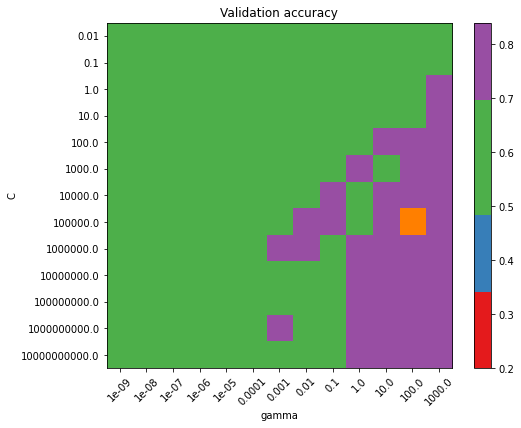

In [ ]:
#finding the primum parameters

from matplotlib.colors import Normalize

# Example of making your own norm.  Also see matplotlib.colors.
# From Joe Kington: This one gives two different linear ramps:
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13) #setting up the C range
gamma_range = np.logspace(-9, 3, 13) #setting up the gamma range
param_grid = dict(gamma=gamma_range, C=C_range) #The dict() function creates a dictionary.
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42) #Stratified ShuffleSplit cross-validator Provides train/test indices to split data in train/test sets.
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv) #Exhaustive search over specified parameter values for an estimator.
grid.fit(X_reduced, zone1_tag) #apply reduced values and tags of zone 1 to gridSearchCV

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)
# classifiers = []
# for C in C_range:
#     for gamma in gamma_range:
#         clf = SVC(C=C, gamma=gamma)
#         clf.fit(X_reduced, zone1_tag)
#         classifiers.append((C, gamma, clf))
scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))#A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.
plt.figure(figsize=(8, 6)) #plot a 8X6 figure
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95) #setting up figure position
plt.imshow( #show up the value of scores in each sub plot
    scores,
    interpolation="nearest",
    cmap='Set1',
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")#setting name of x label
plt.ylabel("C")#setting name of y label
plt.colorbar()#setting the color bar
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)#setting x axis
plt.yticks(np.arange(len(C_range)), C_range)#setting up y axis
plt.title("Validation accuracy")# setting up the title
plt.show()



Applying the SVM model to other zones and verify the model 

f1 score of zone 2 is 0.7070707070707071
precision score of zone 2 is 0.7333333333333334
recall score of zone 2 is 0.8181818181818181
conf_matrix of zone 2 is [[14  8]
 [ 0  7]]


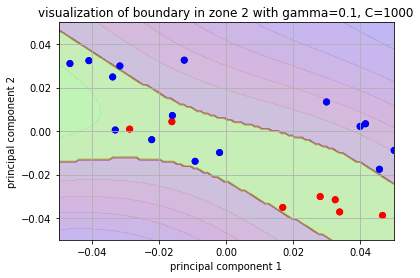

In [ ]:
#applying model in zone 1 to zone 2
#plot zone 2 based on position
zone2_x_axis,zone2_y_axis,zone2_label=member_selection(zone2_number)
zone2_values=[]
zone2_tag=[]

for n in zone2_number:# put the value of stars:x,y,mux,muy into zone2_values, put the values of membership into zone2_tag
  zone2_values.append([df.X[n],df.Y[n],df.MUX[n],df.MUY[n]])
  zone2_tag.append(df.membership[n])
zone2_values=scaler.transform(zone2_values)#transform zone2_value by standard scalar int zone1
# zone2_values = StandardScaler().fit_transform(zone2_values)

PCA_component_zone_2=sig_pca.transform(zone2_values)#transform the values using sig_pca
plt.scatter(PCA_component_zone_2[:,0], PCA_component_zone_2[:,1], c=colormap[zone2_tag])#scatter plot data point of PCA of stars in zone 2
plt.title("visualization of boundary in zone 2 with gamma=0.1, C=1000")
y_tag_zone_2 = rbf_kernel_svm_clf.predict(PCA_component_zone_2) #predict the membership of stars in zone2 using svm

calculate_score_zone(zone2_tag, y_tag_zone_2,2)

plot_predictions(rbf_kernel_svm_clf, [-0.05, 0.05, -0.05, 0.05]) #plot the boundary between membership and non-membership
plot_dataset(PCA_component_zone_2, zone2_tag, [-0.05, 0.05, -0.05, 0.05])#plot the data point




f1 score of zone 3 is 0.5303030303030303
precision score of zone 3 is 0.5777310924369747
recall score of zone 3 is 0.6712962962962963
conf_matrix of zone 3 is [[16 11]
 [ 1  3]]


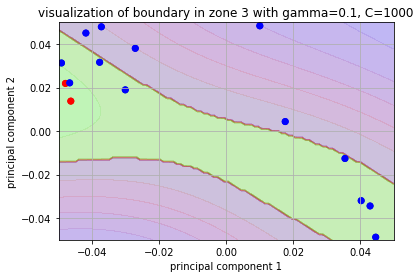

In [ ]:
#applying model in zone 1 to zone 3
#plot zone 3 based on position
zone3_x_axis,zone3_y_axis,zone3_label=member_selection(zone3_number)
zone3_values=[]
zone3_tag=[]

for n in zone3_number:# put the value of stars:x,y,mux,muy into zone3_values, put the values of membership into zone3_tag
  zone3_values.append([df.X[n],df.Y[n],df.MUX[n],df.MUY[n]])
  zone3_tag.append(df.membership[n])
zone3_values=scaler.transform(zone3_values)#transform zone3_value by standard scalar int zone1
# zone3_values = StandardScaler().fit_transform(zone3_values)

PCA_component_zone_3=sig_pca.transform(zone3_values)#transform the values using sig_pca
plt.scatter(PCA_component_zone_3[:,0], PCA_component_zone_3[:,1], c=colormap[zone3_tag])#scatter plot data point of PCA of stars in zone 3
plt.title("visualization of boundary in zone 3 with gamma=0.1, C=1000")
y_tag_zone_3 = rbf_kernel_svm_clf.predict(PCA_component_zone_3)#predict the membership of stars in zone3 using svm
calculate_score_zone(zone3_tag, y_tag_zone_3,3)
plot_predictions(rbf_kernel_svm_clf, [-0.05, 0.05, -0.05, 0.05])#plot the boundary between membership and non-membership
plot_dataset(PCA_component_zone_3, zone3_tag, [-0.05, 0.05, -0.05, 0.05])#plot the data point



f1 score of zone 4 is 0.6590229312063809
precision score of zone 4 is 0.6474358974358975
recall score of zone 4 is 0.7787878787878788
conf_matrix of zone 4 is [[25  8]
 [ 1  4]]


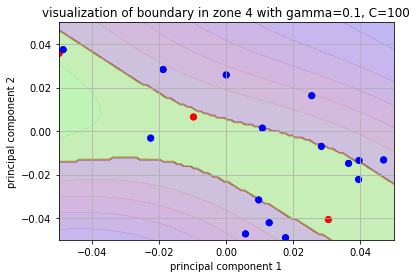

In [ ]:
#applying model in zone 1 to zone 4
#plot zone 4 based on position
zone4_x_axis,zone4_y_axis,zone4_label=member_selection(zone4_number)
zone4_values=[]
zone4_tag=[]

for n in zone4_number:# put the value of stars:x,y,mux,muy into zone4_values, put the values of membership into zone4_tag
  zone4_values.append([df.X[n],df.Y[n],df.MUX[n],df.MUY[n]])
  zone4_tag.append(df.membership[n])
zone4_values=scaler.transform(zone4_values)#transform zone4_value by standard scalar int zone1
# zone3_values = StandardScaler().fit_transform(zone3_values)

PCA_component_zone_4=sig_pca.transform(zone4_values)#transform the values using sig_pca
plt.scatter(PCA_component_zone_4[:,0], PCA_component_zone_4[:,1], c=colormap[zone4_tag])#scatter plot data point of PCA of stars in zone 4
plt.title("visualization of boundary in zone 4 with gamma=0.1, C=100")
y_tag_zone_4 = rbf_kernel_svm_clf.predict(PCA_component_zone_4)#predict the membership of stars in zone3 using svm
calculate_score_zone(zone4_tag, y_tag_zone_4,4)
plot_predictions(rbf_kernel_svm_clf, [-0.05, 0.05, -0.05, 0.05])#plot the boundary between membership and non-membership
plot_dataset(PCA_component_zone_4, zone4_tag, [-0.05, 0.05, -0.05, 0.05])#plot the data point

Plot principal component of data in inner four zones

Text(0, 0.5, 'principle component 2')

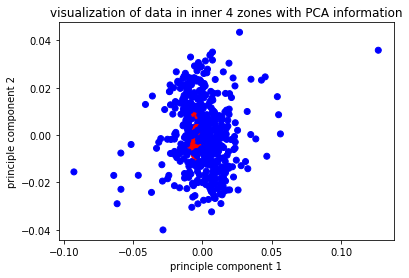

In [ ]:
#plot the pca reduction of original data
#centernoid is (20.1255, 20.002499999999998)
values=[]
df['X'] = df['X'] - 20.1255 # transform the x axis to position to the centeroid
df['Y']=df['Y']-20.002499999999998 # transform the y axis to position to the centeroid
values=df.iloc[:,1:5] #getting value of x.y.mux,muy

tag=df.iloc[:,-1] #getting value of membership
scaler = StandardScaler() #initialize a standard scalar
scaler.fit(values) # fit the scalar with value of x,y, mux,muy


values=scaler.transform(values) #transform the values with scalar
#using PCA reduce


rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0001, fit_inverse_transform=True)
values_reduced = rbf_pca.fit_transform(values) # using PCA to transform value
plt.scatter(values_reduced[:, 0], values_reduced[:, 1], c=colormap[tag]) # plot the values
plt.title("visualization of data in inner 4 zones with PCA information")
plt.xlabel("principle component 1")
plt.ylabel("principle component 2")

Apply SVM to principal component of inner four zone and draw the boundary

{'kpca__gamma': 0.0001, 'kpca__kernel': 'rbf'}
0.9280437896459995
[-0.59918242  0.27109815  0.02832103 -0.0551845 ]
The best parameters are {'C': 100.0, 'gamma': 1000.0} with a score of 0.81
f1 score of zone 1 to 4 is 0.7097054983316408
precision score of zone 1 to 4 is 0.7041208791208791
recall score of zone 1 to 4 is 0.7342370744010088
conf_matrix of zone 1 to 4 is [[45 16]
 [ 7 19]]


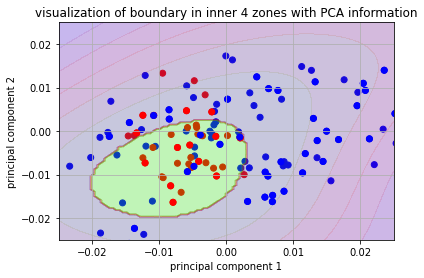

In [ ]:
#using all data as training set and testng 
values=[]
tag=[]
values=df.iloc[:,1:5]#getting value of x.y.mux,muy
tag=df.iloc[:,-1]#getting value of membership



grid_search.fit(values, tag) #finding out a best parameter and best score for PCA
print(grid_search.best_params_)
print(grid_search.best_score_)

scaler = StandardScaler() # initlalize a scalar
scaler.fit(values)# fit the scalar with value of x,y, mux,muy
print(scaler.mean_)

values=scaler.transform(values)#transform the values with scalar
#using PCA reduce


sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)#seting up kernel PCA with sigmoid Kernel


values_reduced = sig_pca.fit_transform(values)
#values_reduced = lin_pca.fit_transform(values)
# plt.scatter(values_reduced[:, 0], values_reduced[:, 1], c=colormap[tag])

#choosing inner four zone reduced 
zone_reduced=[]
zone_tag=[]
#obtain all values and memberships in inner 4 zones
for n in zone1_number:
  zone_reduced.append(values_reduced[n])
  zone_tag.append(tag[n])
for n in zone2_number:
  zone_reduced.append(values_reduced[n])
  zone_tag.append(tag[n])
for n in zone3_number:
  zone_reduced.append(values_reduced[n])
  zone_tag.append(tag[n])
for n in zone4_number:
  zone_reduced.append(values_reduced[n])
  zone_tag.append(tag[n])

zone_reduced=np.array(zone_reduced) #transform datafram into araray
plt.scatter(zone_reduced[:, 0], zone_reduced[:, 1], c=colormap[zone_tag]) #plot the reduced value
plt.title("visualization of boundary in inner 4 zones with PCA information")
#using SVM to classify
C_range = np.logspace(-2, 5, 8) #setting up C range
gamma_range = np.logspace(-3, 3, 7) #setting up gamma range
param_grid = dict(gamma=gamma_range, C=C_range) # The dict() function creates a dictionary.
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42) #Stratified ShuffleSplit cross-validator Provides train/test indices to split data in train/test sets.
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv) #Exhaustive search over specified parameter values for an estimator.
grid.fit(zone_reduced, zone_tag) #fit the grid with values and tag

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

values_train, values_test, tags_train, tags_test = train_test_split( #split data in to 40% train data and 60% test data
    zone_reduced, zone_tag, test_size=0.6, random_state=42)
rbf_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.1,C=1000))
        )) #setting up gamma to 0.1 C to 1000
rbf_kernel_svm_clf.fit(values_train, tags_train) #fit classifier with train data
plot_predictions(rbf_kernel_svm_clf, [-0.025, 0.025, -0.025, 0.025]) #plot boundary
plot_dataset(values_train, tags_train, [-0.025, 0.025, -0.025, 0.025]) #plot data point
tags_pred = rbf_kernel_svm_clf.predict(values_test) #predict the result of test data

from sklearn.metrics import confusion_matrix

calculate_score_zone(tags_test, tags_pred,"1 to 4")




testing different kernel of PCA

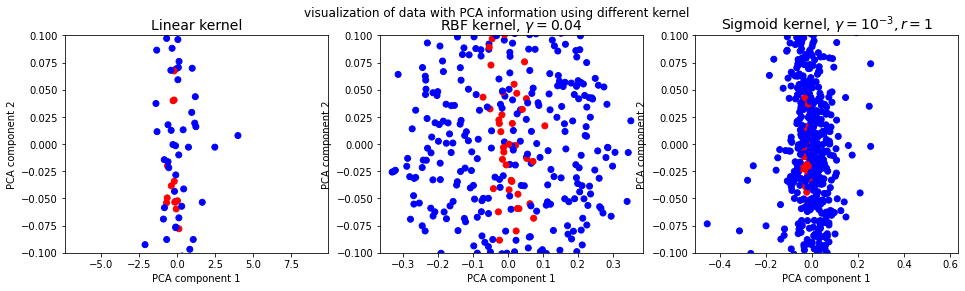

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

#setting up different kernel of PCA
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.01, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.01, coef0=1, fit_inverse_transform=True)
#loop over methods and plot the projection of the Swiss roll
plt.figure(figsize=(16, 4))
plt.suptitle("visualization of data with PCA information using different kernel")
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), 
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), 
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(values)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot), plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colormap[tag])
    plt.ylim(-0.1, 0.1)
    plt.xlabel('PCA component 1')
    plt.ylabel('PCA component 2')

Visualization boundary of using rbf kernel PCA

f1 score of zone 1 is 0.6933333333333334
precision score of zone 1 is 0.7017543859649122
recall score of zone 1 is 0.6956521739130435
conf_matrix of zone 1 is [[14  9]
 [ 5 18]]
f1 score of zone 2 is 0.7410714285714286
precision score of zone 2 is 0.7277777777777779
recall score of zone 2 is 0.7662337662337663
conf_matrix of zone 2 is [[18  4]
 [ 2  5]]
f1 score of zone 3 is 0.6593406593406594
precision score of zone 3 is 0.6439393939393939
recall score of zone 3 is 0.7638888888888888
conf_matrix of zone 3 is [[21  6]
 [ 1  3]]
f1 score of zone 2 is 0.6849087893864014
precision score of zone 2 is 0.7058823529411764
recall score of zone 2 is 0.6696969696969697
conf_matrix of zone 2 is [[31  2]
 [ 3  2]]


Text(0.5, 1.0, 'visualization of boundary and data point in inner four zones')

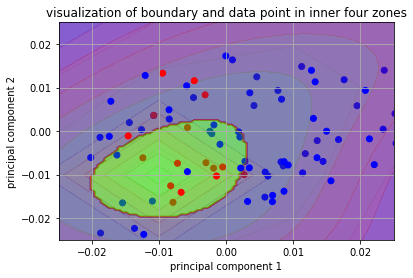

In [ ]:
#using model to test zone 1
zone1_reduced=[]
for n in zone1_number: # collect values in zone 1
  zone1_reduced.append(values_reduced[n])
  

y_zone1_pred = rbf_kernel_svm_clf.predict(zone1_reduced) #making predict using svm classifier

calculate_score_zone(zone1_tag, y_zone1_pred,1)



#using model to test zone 2
zone2_reduced=[]
zone2_tag=[]
for n in zone2_number:# collect values in zone 2
  zone2_reduced.append(values_reduced[n])
  zone2_tag.append(tag[n])
zone2_reduced=np.array(zone2_reduced)
y_zone2_pred = rbf_kernel_svm_clf.predict(zone2_reduced)#making predict using svm classifier

calculate_score_zone(zone2_tag, y_zone2_pred,2)

 
plot_predictions(rbf_kernel_svm_clf, [-1, 1, -1, 1]) #plot boundry of data point in zone 2
plot_dataset(zone2_reduced, zone2_tag, [-1, 1, -1, 1]) #plot data point in zone 2 

#using model to test zone 3
zone3_reduced=[]
zone3_tag=[]
for n in zone3_number:# collect values in zone 3
  zone3_reduced.append(values_reduced[n])
  zone3_tag.append(tag[n])
zone3_reduced=np.array(zone3_reduced)
y_zone3_pred = rbf_kernel_svm_clf.predict(zone3_reduced)#making predict using svm classifier
calculate_score_zone(zone3_tag, y_zone3_pred,3)

plot_predictions(rbf_kernel_svm_clf, [-0.025, 0.025, -0.025, 0.025])#plot boundry of data point in zone 3
plot_dataset(zone3_reduced, zone3_tag, [-0.025, 0.025, -0.025, 0.025])#plot data point in zone 3

#using model to test zone 4
zone4_reduced=[]
zone4_tag=[]
for n in zone4_number:# collect values in zone 4
  zone4_reduced.append(values_reduced[n])
  zone4_tag.append(tag[n])
zone4_reduced=np.array(zone4_reduced)
y_zone4_pred = rbf_kernel_svm_clf.predict(zone4_reduced)#making predict using svm classifier
calculate_score_zone(zone4_tag, y_zone4_pred,2)

plot_predictions(rbf_kernel_svm_clf, [-0.025, 0.025, -0.025, 0.025]) #plot boundry of data point in zone 4
plot_dataset(zone4_reduced, zone4_tag, [-0.025, 0.025, -0.025, 0.025])#plot data point in zone 4
plt.title("visualization of boundary and data point in inner four zones")

classify by ANN

In [ ]:
# disable convergence warning from early stopping
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier




mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)#setting up a Multi layer percetron classifier

history_pca=mlp.fit(values_train, tags_train) #train the classifier with train data
print("Training set score: %f" % mlp.score(values_train, tags_train)) #print the training score
print("Test set score: %f" % mlp.score(values_test, tags_test))#print the testing score
loss_value_pca = mlp.loss_curve_


Iteration 1, loss = 0.77261531
Iteration 2, loss = 0.71258118
Iteration 3, loss = 0.65015594
Iteration 4, loss = 0.59712084
Iteration 5, loss = 0.56071457
Iteration 6, loss = 0.54185785
Iteration 7, loss = 0.53712741
Iteration 8, loss = 0.54107192
Iteration 9, loss = 0.54862925
Iteration 10, loss = 0.55589073
Iteration 11, loss = 0.56094550
Iteration 12, loss = 0.56282043
Iteration 13, loss = 0.56160941
Iteration 14, loss = 0.55805233
Iteration 15, loss = 0.55319727
Iteration 16, loss = 0.54809550
Iteration 17, loss = 0.54358912
Iteration 18, loss = 0.54019619
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.771930
Test set score: 0.701149


test the running time and influence on accuracy for PCA

Time(PCA):  0.0944241819997842
Iteration 1, loss = 0.76825297
Iteration 2, loss = 0.71686018
Iteration 3, loss = 0.66190499
Iteration 4, loss = 0.61519668
Iteration 5, loss = 0.58317247
Iteration 6, loss = 0.56675425
Iteration 7, loss = 0.56288719
Iteration 8, loss = 0.56676789
Iteration 9, loss = 0.57386318
Iteration 10, loss = 0.58066056
Iteration 11, loss = 0.58507752
Iteration 12, loss = 0.58631342
Iteration 13, loss = 0.58463980
Iteration 14, loss = 0.58089155
Iteration 15, loss = 0.57612169
Iteration 16, loss = 0.57135595
Iteration 17, loss = 0.56733843
Iteration 18, loss = 0.56448051
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.750000
Test set score: 0.708333
Time(with PCA):  0.02287897999985944
Iteration 1, loss = 1.47941441
Iteration 2, loss = 0.56235114
Iteration 3, loss = 0.58466445
Iteration 4, loss = 0.59529287
Iteration 5, loss = 0.55973266
Iteration 6, loss = 0.51925174
Iteration 7, loss = 0.50175857
Iter

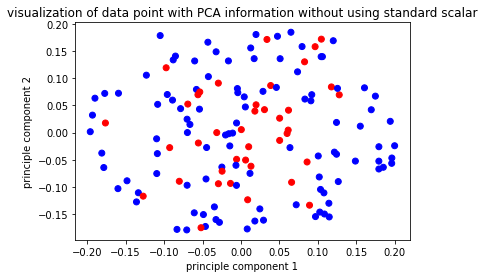

In [ ]:
import timeit
#not using standard scalar
#using all data as training set and testng 
values=[]
tag=[]
values=df.iloc[:,1:5] #collecting values
tag=df.iloc[:,-1] #collecting labels

#using PCA reduce

sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)#seting up kernel PCA with sigmoid Kernel


sig_pca.fit(values)
start = timeit.default_timer()#setting the start time

values_reduced = sig_pca.fit_transform(values)#appplying pca to values

stop = timeit.default_timer()#setting the stop time
print('Time(PCA): ', stop - start)  #print the running time of PCA

# plt.scatter(values_reduced[:, 0], values_reduced[:, 1], c=colormap[tag])

#choosing inner four zone reduced 
#collecting data and tags in four zones
zone_reduced=[]
zone_tag=[]
for n in zone1_number:
  zone_reduced.append(values_reduced[n])
  zone_tag.append(tag[n])
for n in zone2_number:
  zone_reduced.append(values_reduced[n])
  zone_tag.append(tag[n])
for n in zone3_number:
  zone_reduced.append(values_reduced[n])
  zone_tag.append(tag[n])
for n in zone4_number:
  zone_reduced.append(values_reduced[n])
  zone_tag.append(tag[n])

zone_reduced=np.array(zone_reduced)#transform data frame to array
plt.scatter(zone_reduced[:, 0], zone_reduced[:, 1], c=colormap[zone_tag]) #plot data point



#using SVM to classify




C_range = np.logspace(-2, 5, 8) #setting up C range
gamma_range = np.logspace(-3, 3, 7)#setting up gamma range
param_grid = dict(gamma=gamma_range, C=C_range) #The dict() function creates a dictionary
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42) #Stratified ShuffleSplit cross-validator Provides train/test indices to split data in train/test sets.
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv) #Exhaustive search over specified parameter values for an estimator.
grid.fit(zone_reduced, zone_tag) #train the grid with reduced value and tag


values_train, values_test, tags_train, tags_test = train_test_split(
    zone_reduced, zone_tag, test_size=0.5, random_state=42) #split value into 50% train value and 50% testing value

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1) #initialize MLP 

start = timeit.default_timer()#setting the start time
history_pca=mlp.fit(values_train, tags_train)
stop = timeit.default_timer()#setting the stop time
print("Training set score: %f" % mlp.score(values_train, tags_train)) #print the training set score
print("Test set score: %f" % mlp.score(values_test, tags_test)) #print the testing set score
loss_value_pca = mlp.loss_curve_
plt.title("visualization of data point with PCA information without using standard scalar")
plt.xlabel("principle component 1")
plt.ylabel("principle component 2")
print('Time(with PCA): ', stop - start)  #print the running time of training MLP

#calculate time for training time without PCA
zone_value=[]

for n in zone1_number:
  zone_value.append([df.X[n],df.Y[n],df.MUX[n],df.MUY[n]])
for n in zone2_number:
  zone_value.append([df.X[n],df.Y[n],df.MUX[n],df.MUY[n]])
for n in zone3_number:
  zone_value.append([df.X[n],df.Y[n],df.MUX[n],df.MUY[n]])
for n in zone4_number:
  zone_value.append([df.X[n],df.Y[n],df.MUX[n],df.MUY[n]])

values_train, values_test, tags_train, tags_test = train_test_split(
    zone_value, zone_tag, test_size=0.5, random_state=42) #split value into 50% train value and 50% testing value
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1) #initialize MLP 

start = timeit.default_timer()#setting the start time
mlp.fit(values_train, tags_train)
stop = timeit.default_timer()#setting the stop time
print('Time(without PCA): ', stop - start)  #print the running time of training MLP

Iteration 1, loss = 2.43719574
Iteration 2, loss = 0.61398439
Iteration 3, loss = 0.85209821
Iteration 4, loss = 0.95036715
Iteration 5, loss = 0.88228255
Iteration 6, loss = 0.70030950
Iteration 7, loss = 0.49889064
Iteration 8, loss = 0.35721157
Iteration 9, loss = 0.24713748
Iteration 10, loss = 0.18696576
Iteration 11, loss = 0.22771253
Iteration 12, loss = 0.15410101
Iteration 13, loss = 0.20888804
Iteration 14, loss = 0.35799920
Iteration 15, loss = 0.30942921
Iteration 16, loss = 0.17875556
Iteration 17, loss = 0.13155166
Iteration 18, loss = 0.14201084
Iteration 19, loss = 0.19481142
Iteration 20, loss = 0.12895943
Iteration 21, loss = 0.12611368
Iteration 22, loss = 0.12332820
Iteration 23, loss = 0.11713098
Iteration 24, loss = 0.12001913
Iteration 25, loss = 0.10426092
Iteration 26, loss = 0.11388600
Iteration 27, loss = 0.12045208
Iteration 28, loss = 0.09928200
Iteration 29, loss = 0.08868116
Iteration 30, loss = 0.09011934
Iteration 31, loss = 0.08824711
Iteration 32, los

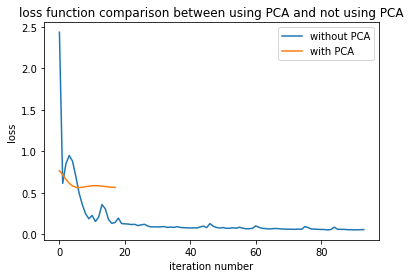

In [ ]:
values_comparison_train, values_comparison_test, tags_comparison_train, tags_comparison_test = train_test_split(
    values, tag, test_size=0.5, random_state=42)  #split value into 50% train value and 50% testing value
start = timeit.default_timer()#setting the start time
mlp.fit(values_comparison_train, tags_comparison_train)
stop = timeit.default_timer()#setting the stop time
print('Time: ', stop - start)#print the running time of training MLP
print("Training set score: %f" % mlp.score(values_comparison_train, tags_comparison_train))#print the training set score
print("testing set score: %f" % mlp.score(values_comparison_test, tags_comparison_test))#print the testing set score
loss_values = mlp.loss_curve_
plt.plot(loss_values,label="without PCA") #plot the loss curve without PCA
plt.plot(loss_value_pca,label="with PCA") #plot the loss curve with PCA
plt.title("loss function comparison between using PCA and not using PCA")
plt.xlabel("iteration number")
plt.ylabel("loss")
plt.legend()
plt.show()

Test the keras 

In [ ]:
#using keras

import tensorflow as tf
from tensorflow import keras
import os

values_train, values_test, tags_train, tags_test = train_test_split(
    zone_reduced, zone_tag, test_size=0.5, random_state=42) #split value into 50% train value and 50% testing value
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[2, 1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
]) #initialize keras layers

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]) #setting up parameters

# fashion_mnist = keras.datasets.fashion_mnist
# (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
# X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# X_test = X_test / 255.
# print((X_valid, y_valid))
values_train=np.array(values_train) #transform datafram into arrays

values_test=np.array(values_test)#transform datafram into arrays
tags_train=np.array(tags_train)#transform datafram into arrays
tags_test=np.array(tags_test)#transform datafram into arrays
history = model.fit(values_train, tags_train, epochs=10,
                    validation_data=(values_test, tags_test))#train the model with training data
model.predict(values_train)#predict the result of trainning data

Epoch 1/10
3/3 [==============================] - 1s 89ms/step - loss: 0.6870 - accuracy: 0.7361 - val_loss: 0.6846 - val_accuracy: 0.7083
Epoch 2/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6807 - accuracy: 0.7500 - val_loss: 0.6793 - val_accuracy: 0.7083
Epoch 3/10
3/3 [==============================] - 0s 13ms/step - loss: 0.6745 - accuracy: 0.7500 - val_loss: 0.6758 - val_accuracy: 0.7083
Epoch 4/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6700 - accuracy: 0.7500 - val_loss: 0.6717 - val_accuracy: 0.7083
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6647 - accuracy: 0.7500 - val_loss: 0.6662 - val_accuracy: 0.7083
Epoch 6/10
3/3 [==============================] - 0s 24ms/step - loss: 0.6583 - accuracy: 0.7500 - val_loss: 0.6631 - val_accuracy: 0.7083
Epoch 7/10
3/3 [==============================] - 0s 25ms/step - loss: 0.6545 - accuracy: 0.7500 - val_loss: 0.6593 - val_accuracy: 0.7083
Epoch 8/10
3/3 [===========

array([[0.5618922 , 0.43810782],
       [0.5726604 , 0.42733958],
       [0.5563299 , 0.44367015],
       [0.56521267, 0.43478733],
       [0.566777  , 0.433223  ],
       [0.56801015, 0.43198985],
       [0.5674901 , 0.4325099 ],
       [0.567521  , 0.432479  ],
       [0.5635686 , 0.4364314 ],
       [0.5625177 , 0.4374823 ],
       [0.5627493 , 0.4372507 ],
       [0.57225513, 0.42774487],
       [0.5716577 , 0.42834228],
       [0.5739372 , 0.4260628 ],
       [0.5626041 , 0.43739587],
       [0.56100494, 0.4389951 ],
       [0.56423247, 0.43576747],
       [0.55685705, 0.44314298],
       [0.5568844 , 0.44311565],
       [0.5598832 , 0.44011673],
       [0.5647639 , 0.43523613],
       [0.5638942 , 0.4361057 ],
       [0.56824535, 0.43175465],
       [0.5722211 , 0.42777887],
       [0.5613629 , 0.43863714],
       [0.56723213, 0.43276787],
       [0.5609631 , 0.4390369 ],
       [0.57297885, 0.42702115],
       [0.56013864, 0.43986142],
       [0.560327  , 0.439673  ],
       [0.

Apply the model to new data from Gaia collaboration

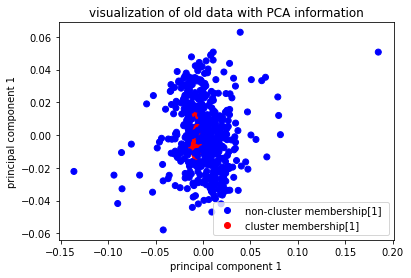

In [ ]:
#plot the pca reduction of original data
#centernoid is (20.1255, 20.002499999999998)
values=[]
df['X'] = df['X'] - 20.1255 # transform the x axis to position to the centeroid
df['Y']=df['Y']-20.002499999999998 # transform the y axis to position to the centeroid
values=df.iloc[:,1:5] #getting value of x.y.mux,muy

tag=df.iloc[:,-1] #getting value of membership
scaler = StandardScaler() #initialize a standard scalar
scaler.fit(values) # fit the scalar with value of x,y, mux,muy


values=scaler.transform(values) #transform the values with scalar
#using PCA reduce


sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)#seting up kernel PCA with sigmoid Kernel
values_reduced = sig_pca.fit_transform(values) # using PCA to transform value

classes = ['non-cluster membership[1] ', 'cluster membership[1] ']


scatter_plot_c(plt,values_reduced[:, 0],values_reduced[:, 1],"principal component 1","principal component 1","visualization of old data with PCA information",tag,colors,classes)

[0 0 0 ... 0 0 0]
6677
1117


(-0.05, 0.05, -0.05, 0.05)

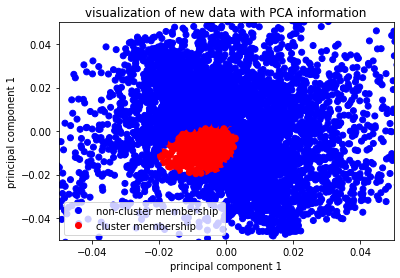

In [ ]:
#classify the data from Gaia collabration with SVM
from numpy.core.fromnumeric import size

filename = 'data.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=str)
# print(data)
# print(float(data[1].split()[1]))
new_data=[]

for n in data:
  
  new_x=float(n.split()[0])
  new_y=float(n.split()[1])
  new_x_motion=float(n.split()[3])
  new_y_motion=float(n.split()[5])
  new_data_id=int(n.split()[2])
  new_data.append([new_x,new_y,new_x_motion,new_y_motion,new_data_id])
# print(new_data)
#taking 4 arcminutes data, center is (289.148202 +30.183466)
arc_minute_new_data=[]
new_minute_data_id=[]
for n in new_data:
  if ((n[0]-289.148202)**2+(n[1]-30.183466)**2)<=0.0044444:
    arc_minute_new_data.append(n)
    new_minute_data_id.append(n[4])
# print(size(new_data))
# print(arc_minute_new_data)
# print(size(arc_minute_new_data))

#transform degree into minimutes
miniminutes_new_data=[]
for n in arc_minute_new_data:
  temp=[(n[0]-289.148202)*60,(n[1]-30.183466)*60,n[2],n[3]]
  miniminutes_new_data.append(temp)
# print(miniminutes_new_data)
#plot new data

standard_minutes_new_data=StandardScaler().fit_transform(miniminutes_new_data)
principalComponents_minutes_new_data = sig_pca.transform(standard_minutes_new_data)






#predict with svm
tags_pred_minute_new_Data = rbf_kernel_svm_clf.predict(principalComponents_minutes_new_data)
print(tags_pred_minute_new_Data)

prediction=[]
print(len(tags_pred_minute_new_Data))
count=0
number_of_member=0
for n in tags_pred_minute_new_Data:
  temp=[new_minute_data_id[count],n]
  if n==1:
    number_of_member=number_of_member+1
  count=count+1
  prediction.append(temp)
print(number_of_member)
with open("prediction.txt", "w+") as f:
  for i in prediction:
        f.write(str(i))
        f.write('\n')

colors = ListedColormap(['b','r'])

classes = ['non-cluster membership ', 'cluster membership ']

scatter_plot_c(plt,principalComponents_minutes_new_data[:, 0],principalComponents_minutes_new_data[:, 1],"principal component 1","principal component 1","visualization of new data with PCA information",tags_pred_minute_new_Data,colors,classes)
plt.axis([-0.05, 0.05, -0.05, 0.05])

In [ ]:
#the time cost for dimensionality